In [1]:
# 1. Importar el conjunto de datos.
import pandas as pd
datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
datos_usuarios

,Edad,Género,Estilo Musical
0,18,1,Electrónica
1,20,1,Electrónica
2,22,1,Electrónica
3,25,1,Electrónica
4,29,1,Hip Hop
5,30,1,Hip Hop
6,34,1,Hip Hop
7,40,1,Clásica
8,45,1,Clásica
9,52,1,Clásica


In [2]:
# 2. Limpiar o preparar los datos.
# 2.a. Eliminar columna de Estilo Musical, de manera que nos quedemos con solo la Edad y el Género - Input
import pandas as pd
datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
X = datos_usuarios.drop(columns=['Estilo Musical'])
X

,Edad,Género
0,18,1
1,20,1
2,22,1
3,25,1
4,29,1
5,30,1
6,34,1
7,40,1
8,45,1
9,52,1


In [3]:
# 2. Limpiar o preparar los datos.
# 2.b. Crear variable de predicción - Output
import pandas as pd
datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
X = datos_usuarios.drop(columns=['Estilo Musical'])
y = datos_usuarios['Estilo Musical']
y

0     Electrónica
1     Electrónica
2     Electrónica
3     Electrónica
4         Hip Hop
5         Hip Hop
6         Hip Hop
7         Clásica
8         Clásica
9         Clásica
10            Pop
11            Pop
12            Pop
13    Alternativa
14    Alternativa
15    Alternativa
16    Alternativa
17        Clásica
18        Clásica
19        Clásica
Name: Estilo Musical, dtype: object

In [4]:
# 3. Crear un modelo y hacer una primera predicción
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
X = datos_usuarios.drop(columns=['Estilo Musical'])
y = datos_usuarios['Estilo Musical']

model = DecisionTreeClassifier()

model.fit(X.values, y)
predictions = model.predict([[21, 1], [42, 2]])
predictions

array(['Electrónica', 'Clásica'], dtype=object)

In [7]:
# 4. Medir la precisión del modelo
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
X = datos_usuarios.drop(columns=['Estilo Musical'])
y = datos_usuarios['Estilo Musical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = DecisionTreeClassifier()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.75

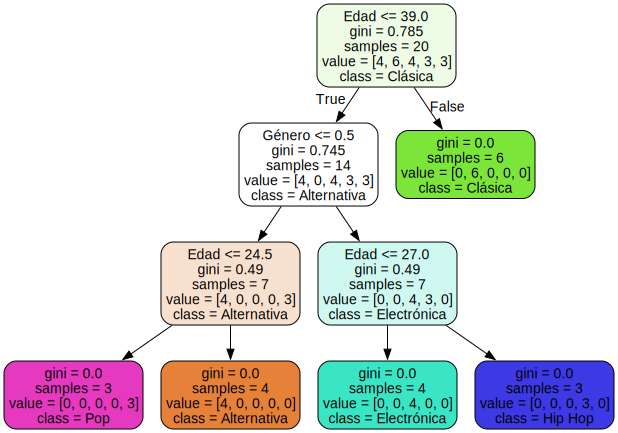

In [8]:
# 5. Visualizar los datos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import os

datos_usuarios = pd.read_csv('UsuariosActivos.csv', sep=';')
X = datos_usuarios.drop(columns=['Estilo Musical'])
y = datos_usuarios['Estilo Musical']

model = DecisionTreeClassifier()
model.fit(X, y)

export_graphviz(model, out_file='music-recommender.dot',
                    feature_names=['Edad', 'Género'],
                    class_names=sorted(y.unique()),
                    label='all',
                     rounded=True,
                     filled=True)

Source.from_file('music-recommender.dot')